In [127]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ast

Read the data

In [128]:
battery_df = pd.read_csv("battery_merged.csv")

In [129]:
battery_df.head()

,Property,Name,Value,Raw_unit,Raw_value,Unit,Num_records,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,Title,Journal,Date,Correctness
0,Capacity,Fe2O3 / C,659.0,mAhg−1,and 659,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Fe': '2.0', 'O': '3.0'}, {'C': '1.0'}]",10.1016/j.jallcom.2011.10.022,"discharge and charge capacity,",CDE,"S,",None,None,SOLVOTHERMALPREPARATIONLITHIUMSTORAGEPROPERTIE...,Journal of Alloys and Compounds,2011-10-17,None
1,Coulombic Efficiency,Ni @ C,100.0,%,100,Percent^(1.0),1,"[{'Ni': '1.0'}, {'C': '1.0'}]",10.1039/C6TA02339H,"coulombic,",CDE,None,None,None,Mesoporous Ni@C hybrids for a high energy aque...,Journal of Materials Chemistry A,2016/06/14,None
2,Voltage,Li2O2,2.3,V,2.3,Volt^(1.0),4,"[{'Li': '2.0', 'O': '2.0'}]","10.1016/j.electacta.2015.06.071, 10.1039/C6TA0...","voltage, voltage,",CDE,"R,",None,None,"CAPACITYENHANCEMENTALITHIUMOXYGENFLOWBATTERY, ...","Electrochimica Acta, Journal of Materials Chem...","2015-06-24, 2016/06/07, 2015/07/01, 2019-09-18",None
3,Capacity,Li2C8H4O4,85.0,mAhg−1,85,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Li': '2.0', 'C': '8.0', 'H': '4.0', 'O': '4...",10.1016/j.pnsc.2016.06.004,"charge capacity,",CDE,"S,",None,"{'current_value': '0.2', 'current_units': 'C'},",ADESIGNEDCORESHELLSTRUCTURALCOMPOSITELITHIUMTE...,Progress in Natural Science: Materials Interna...,2016-08-10,None
4,Capacity,NVP / C,83.0,mAhg−1,"96.6 , 90.5 , 86.8 , 83.0 , 77.1 , 68.0 , and ...",Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'N': '1.0', 'V': '1.0', 'P': '1.0'}, {'C': '...",10.1016/j.ensm.2019.05.041,"discharge capacities,",CDE,"S,",None,"{'current_value': '1', 'current_units': 'C'},",UNDERSTANDINGSUPERIORSODIUMIONSTORAGEINANOVELN...,Energy Storage Materials,2019-06-01,None


Battery data was extracted from various scientific algorithms by a specific algorithm presented here: https://www.nature.com/articles/s41597-020-00602-2

Sometimes the algorithm makes mistakes, but the overall precision of the algorithm is 80% as tested on the data where correct records were already known.

For further research we can leave only the data with correctness = none or true.

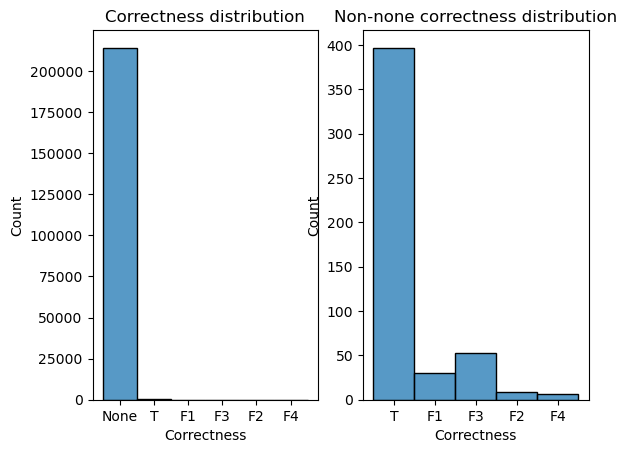

In [130]:
f, axes = plt.subplots(1, 2)
axes[0].set_title('Correctness distribution')
sns.histplot(battery_df, x='Correctness', ax=axes[0])
axes[1].set_title('Non-none correctness distribution')
sns.histplot(battery_df.query("Correctness != 'None'"), x='Correctness', ax=axes[1]);

In [131]:
battery_df = battery_df.query("Correctness in ('None', 'T')")
len(battery_df)

214518

Next lets analyze the warning field, the authors of the database marked the questionable values with a warning:

"The aforementioned warning flags, L, R and S, account for this diversity
in user motivation, by providing an option for users to remove data which might be circumspect owing to their
values being: near their extreme limit, questionable in terms of relevance to battery materials, or being part of a data series. While use of these warning flags will remove a lot of data, the database afforded would have a higher
overall precision of ca. 85%; an increase of 4.2% or 0.8% from use of the “L” or “R” warning flag, respectively." - quote from the paper

In [132]:
battery_df['Warning_binary'] = (battery_df['Warning'] != 'None').astype(str)

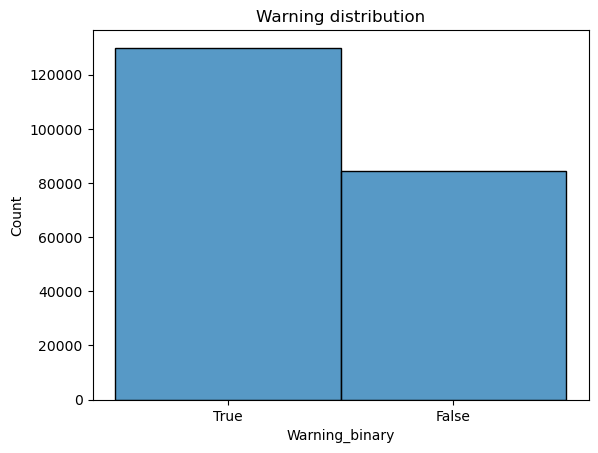

In [133]:
plt.title('Warning distribution')
sns.histplot(battery_df, x='Warning_binary');

Lets leave only the records with no warning for now

In [134]:
battery_df = battery_df.query("Warning == 'None'")
len(battery_df)

84568

In [135]:
battery_df.head()

,Property,Name,Value,Raw_unit,Raw_value,Unit,Num_records,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,Title,Journal,Date,Correctness,Warning_binary
1,Coulombic Efficiency,Ni @ C,100.00,%,100,Percent^(1.0),1,"[{'Ni': '1.0'}, {'C': '1.0'}]",10.1039/C6TA02339H,"coulombic,",CDE,None,None,None,Mesoporous Ni@C hybrids for a high energy aque...,Journal of Materials Chemistry A,2016/06/14,None,False
6,Capacity,Cu(OH)2,895.00,mAh/g,895 and 707,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'O': '2.0', 'H': '2.0', 'Cu': '1.0'}]",10.1016/j.matlet.2012.09.006,"discharge and charge capacities,",CDE,None,None,None,FACILESYNTHESISCUONANORODFORLITHIUMSTORAGEAPPL...,Materials Letters,2012-09-11,None,False
9,Energy,SnSbCo,1226.78,Wh/kg,1226.7799999999997,KiloGram^(-1.0) WattHour^(1.0),1,"[{'Sn': '1.0', 'Sb': '1.0', 'Co': '1.0'}]",None,None,Calculated,None,None,None,None,None,None,None,False
11,Capacity,NCO / CNTs nano,771.00,mAhg−1,771,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'N': '1.0', 'C': '1.0', 'O': '1.0'}]",10.1039/C5RA27708F,"specific capacity,",CDE,None,None,"{'current_value': '2000', 'current_units': 'mA...",The design and synthesis of porous NiCo 2 O 4 ...,RSC Advances,2016/03/29,None,False
13,Capacity,TiO2 / NiO / rGO nano,324.00,mAh/g,324,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Ti': '1.0', 'O': '2.0'}, {'Ni': '1.0', 'O':...",10.1016/j.jallcom.2018.10.010,"discharge capacity,",CDE,None,None,"{'current_value': '20', 'current_units': 'mA/g...",TIO2NIOREDUCEDGRAPHENEOXIDENANOCOMPOSITESANODE...,Journal of Alloys and Compounds,2018-10-03,None,False


Lets check if units are consistent for each property

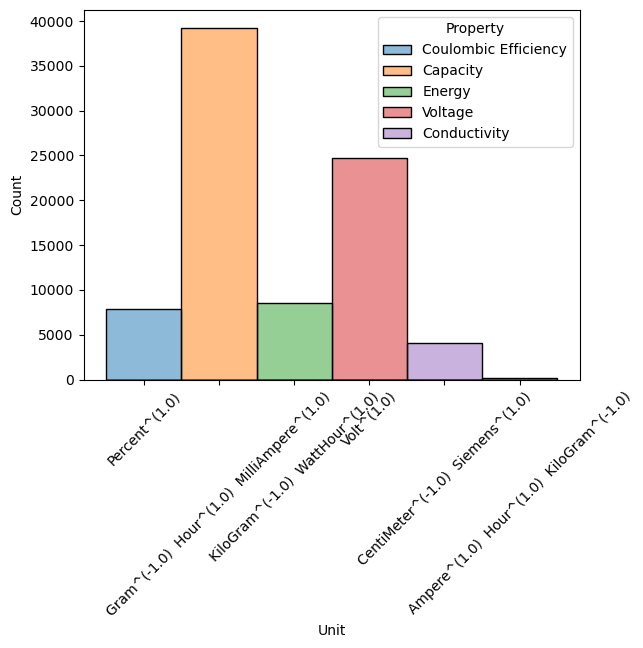

In [136]:
sns.histplot(battery_df, x='Unit', hue='Property')
plt.xticks(rotation=45);

We can see that there is a singular consistent unit for each property except for the Capacity. Lets remove the records with the faulty unit

In [137]:
battery_df = battery_df.query("Unit != 'Ampere^(1.0)  Hour^(1.0)  KiloGram^(-1.0)'")

After cleaning the original dataset lets transform it each property is a column

In [138]:
df = battery_df.pivot_table(
    index=['Name', 'Extracted_name'],
    columns='Property',
    values='Value'
)
df = df.reset_index()

In [139]:
df.head()

Property,Name,Extracted_name,Capacity,Conductivity,Coulombic Efficiency,Energy,Voltage
0,( 1 0 3 ) and ( 1 1 0 ) plane of delta-Mn3N2,"[{'Mn': '3.0', 'N': '2.0'}]",414.2,NaN,90.0,NaN,NaN
1,( 1 0 4 ) of CoCO3,"[{'Co': '1.0', 'C': '1.0', 'O': '3.0'}]",NaN,NaN,NaN,NaN,3.00
2,( 1 O 1 ) H,"[{'O': '1.0', 'H': '1.0'}]",NaN,NaN,NaN,NaN,3.65
3,( 1 − 2x)Li2MnO3·(3x)LiMn0.5Ni0.5O2,"[{'Li': '2.0', 'Mn': '1.0', 'O': '3.0'}]",NaN,NaN,NaN,NaN,4.60
4,( 1 − x)Li1.2Mn0.6Ni0.2O2·xLiMn1.5Ni0.5O4,"[{'Li': '1.2', 'Mn': '0.6', 'Ni': '0.2', 'O': ...",290.0,NaN,NaN,NaN,NaN


Lets analyze value distributions

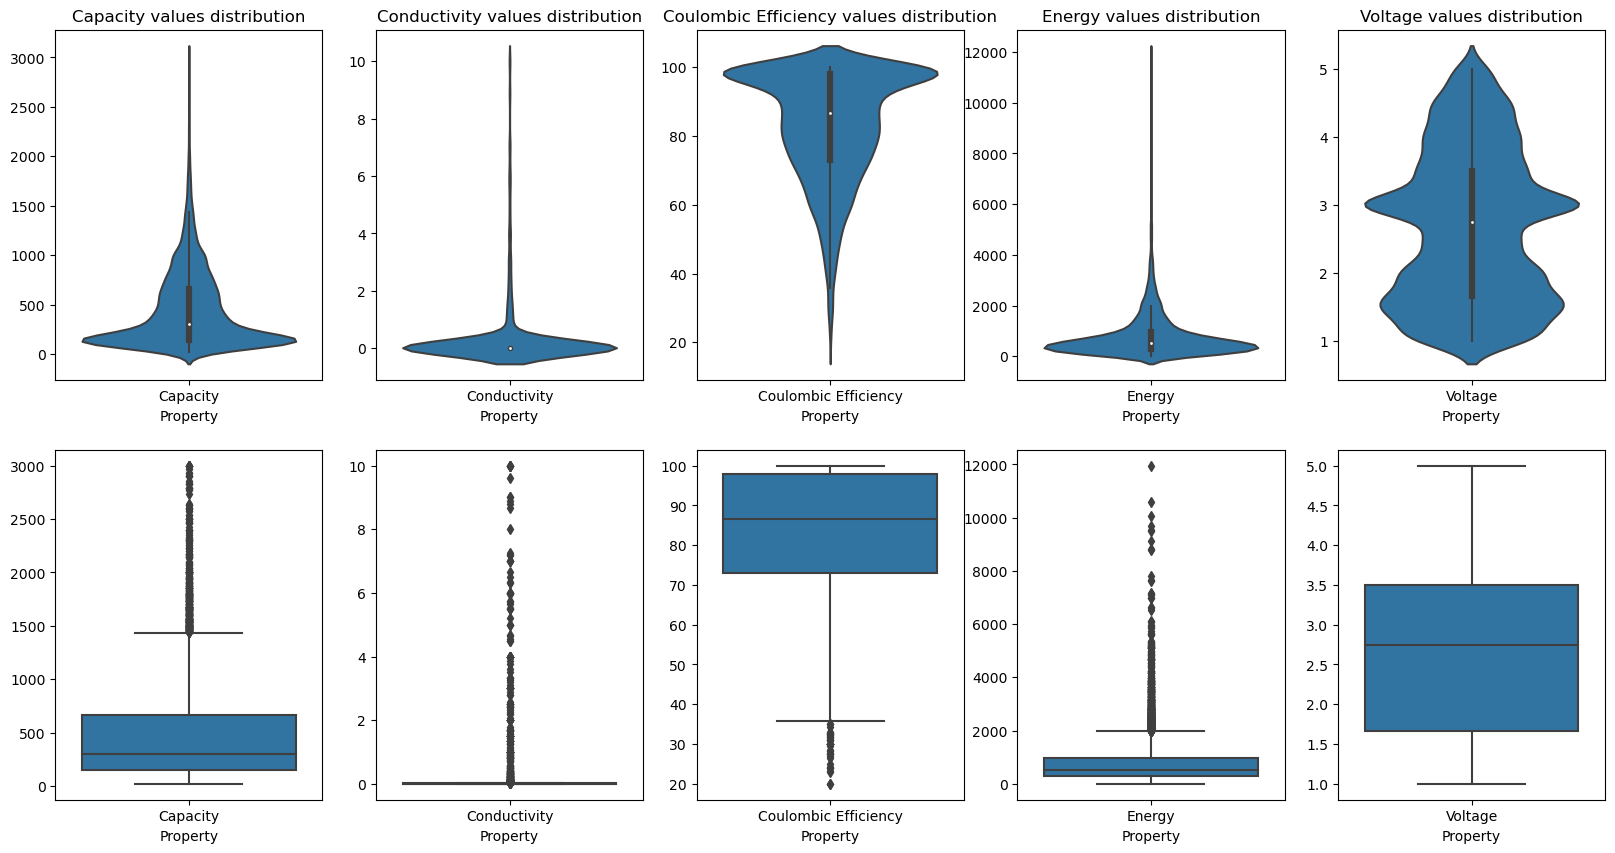

In [140]:
f, axes = plt.subplots(2, 5)
f.set_size_inches(20, 10)

properties = ['Capacity', 'Conductivity', 'Coulombic Efficiency', 'Energy', 'Voltage']
for i, property in enumerate(properties):
    axes[0][i].set_title(f'{property} values distribution')
    sns.violinplot(data=df[[property]], ax=axes[0][i])
    sns.boxplot(data=df[[property]], ax=axes[1][i])
    
plt.show()

Lets detect the outliers using the 1.5 x IQR criterion

In [141]:
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

total_outliers = pd.Index([])

for property in properties:
    outliers = get_outliers(df, property)
    total_outliers = total_outliers.union(outliers)
    print(f"{property} has {len(outliers)} outliers")
    
print(f"Total outlier rows: {len(total_outliers)}")

Capacity has 413 outliers
Conductivity has 367 outliers
Coulombic Efficiency has 39 outliers
Energy has 682 outliers
Voltage has 0 outliers
Total outlier rows: 1428


Lets get rid of outliers

In [142]:
df.drop(total_outliers, inplace=True)
len(df)

23673

Lets take a look at the extracted name property. First lets parse the json

In [143]:
df['parsed_name'] = df['Extracted_name'].apply(lambda x: ast.literal_eval(x))
df['elements_cnt'] = df['parsed_name'].apply(lambda x: len(x))

Next lets see if extracted_name is unique

In [144]:
print(f"Dataframe len = {len(df)}, unique extracted names = {df['Extracted_name'].nunique()}")

Dataframe len = 23673, unique extracted names = 12815


We need to process duplicate values

In [145]:
grouped_df = df[['Extracted_name', 'Name']].groupby(by='Extracted_name', as_index=False).count()
grouped_df.query('Name > 1').sort_values(by='Name', ascending=False)

Property,Extracted_name,Name
11546,"[{'Sn': '1.0', 'O': '2.0'}]",413
12014,"[{'Ti': '1.0', 'O': '2.0'}]",335
7922,"[{'Mo': '1.0', 'S': '2.0'}]",255
4177,"[{'Li': '1.0', 'Fe': '1.0', 'P': '1.0', 'O': '...",251
2374,"[{'Fe': '3.0', 'O': '4.0'}]",175
...,...,...
5614,"[{'Li': '1.0'}, {'Si': '1.0', 'O': '1.0'}]",2
5581,"[{'Li': '1.0'}, {'P': '1.0', 'V': 'd', 'F': '1...",2
5573,"[{'Li': '1.0'}, {'O': '2.0'}]",2
5566,"[{'Li': '1.0'}, {'Ni': '1.0', 'Fe': '2.0', 'O'...",2


2913 elements out of 12815 unique extracted names have duplicate rows. Lets get rid of these values for now.

In [146]:
duplicate_names = grouped_df.query('Name > 1')['Extracted_name']
df = df[df['Extracted_name'].apply(lambda name: name not in duplicate_names.values) & (df['elements_cnt'] == 1)]
len(df)

6859

We're left with 6859 records

### Null values

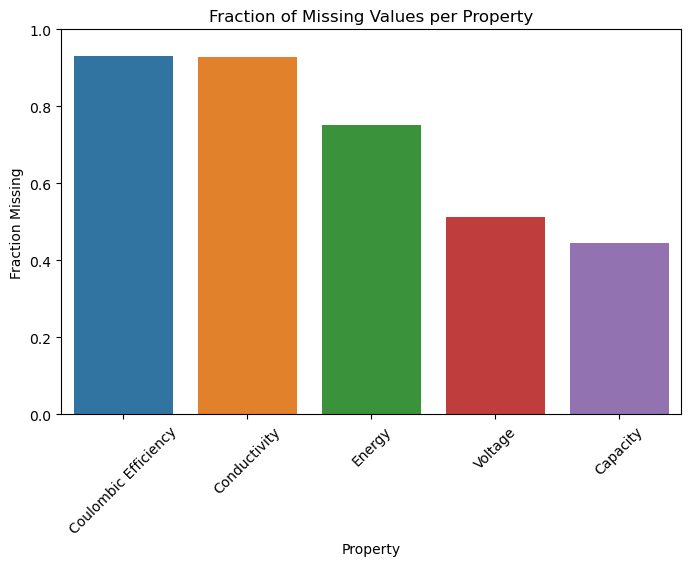

In [147]:
missing_fraction = df[properties].isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_fraction.index, y=missing_fraction.values)
plt.ylim((0, 1))
plt.ylabel('Fraction of Missing Values')
plt.xlabel('Property')
plt.title('Fraction of Missing Values per Property')
plt.xticks(rotation=45)
plt.ylabel('Fraction Missing')
plt.show()


Our goal for this research is to try to predict these 5 missing target variables.

## Feature engineering

We know that some of the properties are already present. In this case we want to use them to predict the missing ones. To handle this lets add indicator features corresponding to whether we already know the value of the property or not.

In [148]:
for property in properties:
    df[f'{property}_known'] = (~df[property].isna()).astype(int)

### Specific chemical properties

First, lets identify all the unique chemical elements present in the dataset

In [149]:
# Extracting all unique elements:
unique_elements = set()

for value in df['parsed_name']:
    for composition in value:
        unique_elements.update(composition.keys())

# Show all unique elements found
print(f"Unique elements identified ({len(unique_elements)} total):")
print(unique_elements)

Unique elements identified (92 total):
{'Si', 'Cl', 'C', 'Rh', 'Ge', 'N', 'Ti', 'Re', 'Ir', 'Gd', 'Pb', 'Ru', 'Na', 'Pm', 'Sr', 'Ce', 'Al', 'Cd', 'S', 'Tl', 'Nd', 'Sc', 'Ta', 'Ga', 'F', 'In', 'W', 'Hs', 'P', 'Zn', 'Sn', 'Au', 'Cs', 'Cn', 'At', 'Hg', 'Pu', 'Pd', 'Ag', 'Eu', 'Nb', 'Ra', 'Zr', 'As', 'Hf', 'Bi', 'B', 'Pt', 'Np', 'Ca', 'Br', 'I', 'Se', 'Te', 'Dy', 'Ac', 'Ni', 'Sb', 'Tb', 'O', 'Mn', 'Pr', 'Os', 'Ho', 'Sm', 'Mo', 'H', 'Yb', 'V', 'La', 'U', 'Ba', 'Rf', 'K', 'Li', 'Mg', 'Pa', 'Cu', 'Po', 'Es', 'Be', 'Er', 'Ar', 'Co', 'Sg', 'Am', 'Rb', 'Th', 'Y', 'Cm', 'Cr', 'Fe'}


Lets check if all of these elements actually exist

In [150]:
# !pip3 install mendeleev
import mendeleev as md

In [ ]:
true_elements = dict()
for el in unique_elements:
    true_elements[el] = element_exists(el)

In [177]:
def element_exists(identifier):
    try:
        md.element(identifier)
        return True
    except:
        return False

    
def is_int(input_string):
    try:
         value = float(input_string)
    except ValueError:
        return False
    return value.is_integer()

# check if element actually exists and that the element fraction is numeric
def validate_record(record):
    for composition in record:
        for key in composition.keys():
            if not true_elements[key] or not(is_int(composition[key])):
                return False
    return True

In [179]:
valid_records = df['parsed_name'].apply(validate_record)
print(f"Valid records fraction: {valid_records.mean()}")

df = df[valid_records]

Valid records fraction: 0.5310526315789473


Add fraction feature corresponding to every element. Sometimes there are non numeric values in place for element fraction lets 

In [180]:
for element in unique_elements:
    df.loc[:, f'{element}_fraction'] = df['parsed_name'].apply(lambda x: float(x[0].get(element, 0)))

/var/folders/8v/bx_f_4bj0klchryrhdgxty9h0000gn/T/ipykernel_68717/419576179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'{element}_fraction'] = df['parsed_name'].apply(lambda x: float(x[0].get(element, 0)))


In [183]:
len(df)

3027

# Model application

In [184]:
df

Property,Name,Extracted_name,Capacity,Conductivity,Coulombic Efficiency,Energy,Voltage,parsed_name,elements_cnt,Capacity_known,...,Ar_fraction,Co_fraction,Sg_fraction,Am_fraction,Rb_fraction,Th_fraction,Y_fraction,Cm_fraction,Cr_fraction,Fe_fraction
14,( 90PEO:10Zn(CF3SO3)2 ) + 5 ZnO,"[{'C': '2.0', 'F': '6.0', 'S': '2.0', 'O': '6....",NaN,0.000018,NaN,NaN,NaN,"[{'C': '2.0', 'F': '6.0', 'S': '2.0', 'O': '6....",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,"(5,5′-bisphenylethynyl-2,2′-bipyridyl)Re(CO)3Cl","[{'C': '3.0', 'O': '3.0', 'Re': '1.0', 'Cl': '...",NaN,NaN,NaN,NaN,1.95,"[{'C': '3.0', 'O': '3.0', 'Re': '1.0', 'Cl': '...",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,(BaCa)(ZrTi)O3,"[{'Ba': '1.0', 'Ca': '1.0', 'Zr': '1.0', 'Ti':...",NaN,NaN,NaN,NaN,3.20,"[{'Ba': '1.0', 'Ca': '1.0', 'Zr': '1.0', 'Ti':...",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,(BiO)2CO3,"[{'Bi': '2.0', 'O': '5.0', 'C': '1.0'}]",NaN,NaN,37.5,732.865792,NaN,"[{'Bi': '2.0', 'O': '5.0', 'C': '1.0'}]",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,(BiO)4CO3(OH)2,"[{'Bi': '4.0', 'O': '9.0', 'H': '2.0', 'C': '1...",210.0,NaN,NaN,NaN,1.10,"[{'Bi': '4.0', 'O': '9.0', 'H': '2.0', 'C': '1...",1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25073,ZrLi2P2O8·nH2O,"[{'Zr': '1.0', 'Li': '2.0', 'P': '2.0', 'O': '...",NaN,0.000150,NaN,NaN,NaN,"[{'Zr': '1.0', 'Li': '2.0', 'P': '2.0', 'O': '...",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25080,ZrNb24O62,"[{'Zr': '1.0', 'Nb': '24.0', 'O': '62.0'}]",NaN,NaN,NaN,NaN,1.67,"[{'Zr': '1.0', 'Nb': '24.0', 'O': '62.0'}]",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25087,ZrOF2,"[{'Zr': '1.0', 'O': '1.0', 'F': '2.0'}]",NaN,NaN,NaN,NaN,4.50,"[{'Zr': '1.0', 'O': '1.0', 'F': '2.0'}]",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25090,ZrP2O7,"[{'Zr': '1.0', 'P': '2.0', 'O': '7.0'}]",533.0,NaN,NaN,932.750000,3.00,"[{'Zr': '1.0', 'P': '2.0', 'O': '7.0'}]",1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
